# Task
Tell me about this dataset.

Here is all the data you need:
"data.csv"

## Data loading

### Subtask:
Load the dataset "data.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "data.csv" into a pandas DataFrame and display its first 5 rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'data.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'data.csv'. Check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,113948.0,NaN
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2369991.0,NaN
2,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1246291.0,NaN
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,479867.0,NaN
4,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,193559.0,NaN


(18467, 8)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify missing values, and potential outliers.


**Reasoning**:
Explore the dataset by examining data types, missing values, descriptive statistics, unique values, and potential outliers.



title                  object
type                   object
genres                 object
releaseYear           float64
imdbId                 object
imdbAverageRating     float64
imdbNumVotes          float64
availableCountries     object
dtype: object

Missing values per column:
 title                   587
type                      0
genres                  680
releaseYear              36
imdbId                 1544
imdbAverageRating      1962
imdbNumVotes           1962
availableCountries    18403
dtype: int64

Descriptive statistics:
         releaseYear  imdbAverageRating  imdbNumVotes
count  18431.000000       16505.000000  1.650500e+04
mean    2006.883240           6.372372  2.454425e+04
std       18.585113           1.168519  9.767672e+04
min     1902.000000           1.300000  5.000000e+00
25%     2001.000000           5.600000  1.990000e+02
50%     2014.000000           6.500000  1.195000e+03
75%     2020.000000           7.200000  7.634000e+03
max     2025.000000           

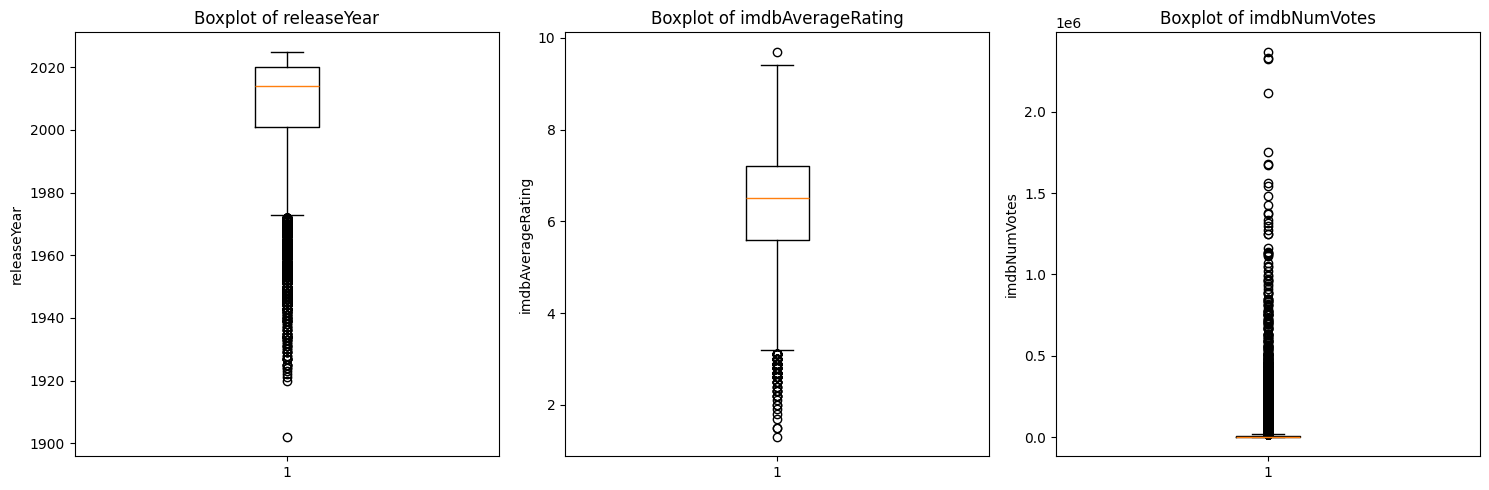


Summary:
The dataset has 18467 rows and 8 columns.
Missing values are present in 'availableCountries' column and other columns. The distribution of numerical features can be further investigated.


In [2]:
# Examine data types
print(df.dtypes)

# Missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())

# Unique values and frequencies for categorical columns
for col in ['type', 'genres', 'availableCountries']:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts()}")

# Shape of the DataFrame
print(f"\nShape of DataFrame: {df.shape}")

# Identify potential outliers using box plots
import matplotlib.pyplot as plt
numerical_cols = ['releaseYear', 'imdbAverageRating', 'imdbNumVotes']

plt.figure(figsize=(15, 5))  # Adjust figure size

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Summarize findings
print("\nSummary:")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("Missing values are present in 'availableCountries' column and other columns. The distribution of numerical features can be further investigated.")

## Data analysis

### Subtask:
Analyze the dataset to gain insights into the relationships between variables.


**Reasoning**:
Calculate the correlation matrix for numerical features, create a heatmap, and analyze the relationship between categorical and numerical features.



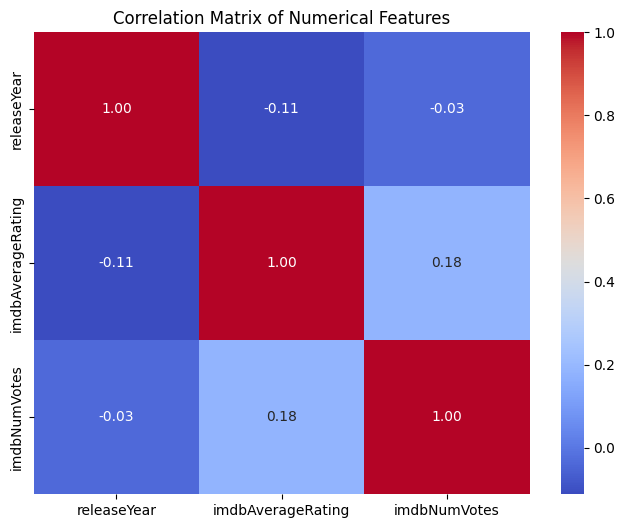


Grouped Summary Statistics:

Summary statistics for type grouped by imdbAverageRating:
           mean  median  count
type                          
movie  6.161419     6.3  12856
tv     7.115593     7.3   3649

Summary statistics for genres grouped by imdbAverageRating:
                                    mean  median  count
genres                                                 
Action                          5.053012    4.90     83
Action, Adventure               6.007143    6.45     14
Action, Adventure, Animation    6.428395    6.50     81
Action, Adventure, Biography    6.950000    6.50      6
Action, Adventure, Comedy       5.772115    5.90    104
...                                  ...     ...    ...
War                             4.860000    3.90      5
War, History                         NaN     NaN      0
War, History, Documentary            NaN     NaN      0
Western                         5.882927    5.80    123
Western, Crime, Drama, Romance       NaN     NaN      0

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation matrix for numerical features
numerical_cols = ['releaseYear', 'imdbAverageRating', 'imdbNumVotes']
df_numerical = df[numerical_cols].dropna()  # Drop rows with missing numerical values
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Grouped summary statistics for categorical features
print("\nGrouped Summary Statistics:")
for col in ['type', 'genres']:  # Exclude availableCountries due to high missing values
    print(f"\nSummary statistics for {col} grouped by imdbAverageRating:")
    grouped = df.groupby(col)['imdbAverageRating'].agg(['mean', 'median', 'count'])
    print(grouped)

# Investigate relationship between availableCountries and other variables
print("\nAnalysis of availableCountries (excluding missing values):")
df_available = df.dropna(subset=['availableCountries'])
print(df_available.groupby('availableCountries')['imdbAverageRating'].mean())

# Create a binary column indicating US availability
df['available_in_US'] = np.where(df['availableCountries'].str.contains('US', na=False), 1, 0)
print("\nSummary statistics for available_in_US grouped by imdbAverageRating:")
print(df.groupby('available_in_US')['imdbAverageRating'].agg(['mean', 'median', 'count']))

## Data visualization

### Subtask:
Visualize the key characteristics and relationships within the dataset.


**Reasoning**:
Generate the visualizations as per the instructions, focusing on distributions, relationships, and categorical frequencies.



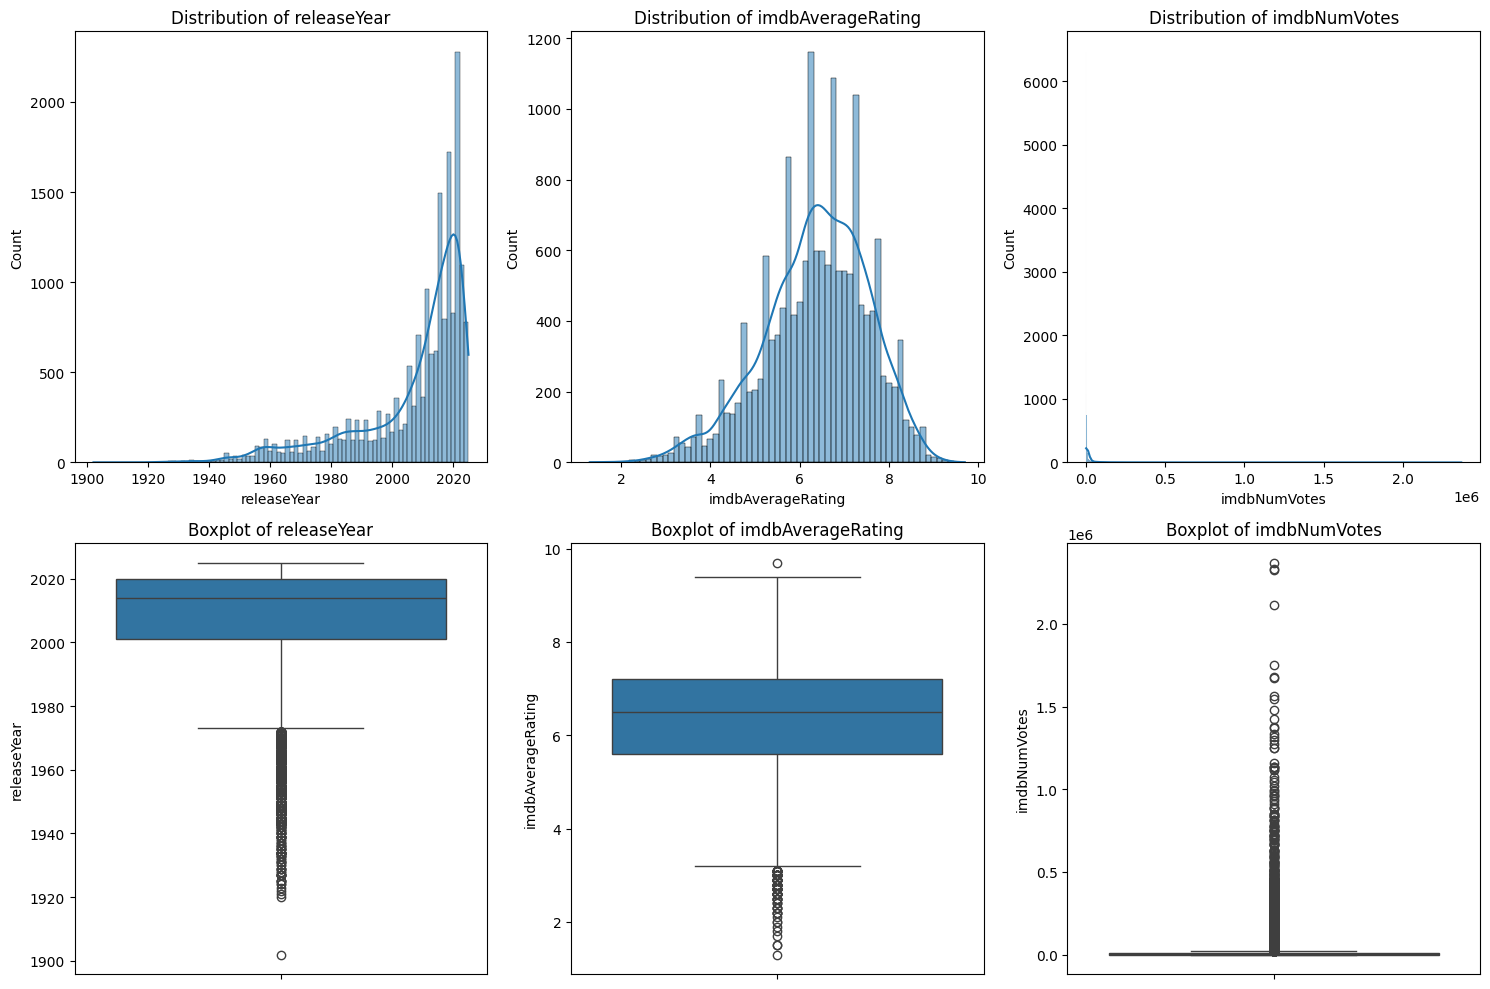

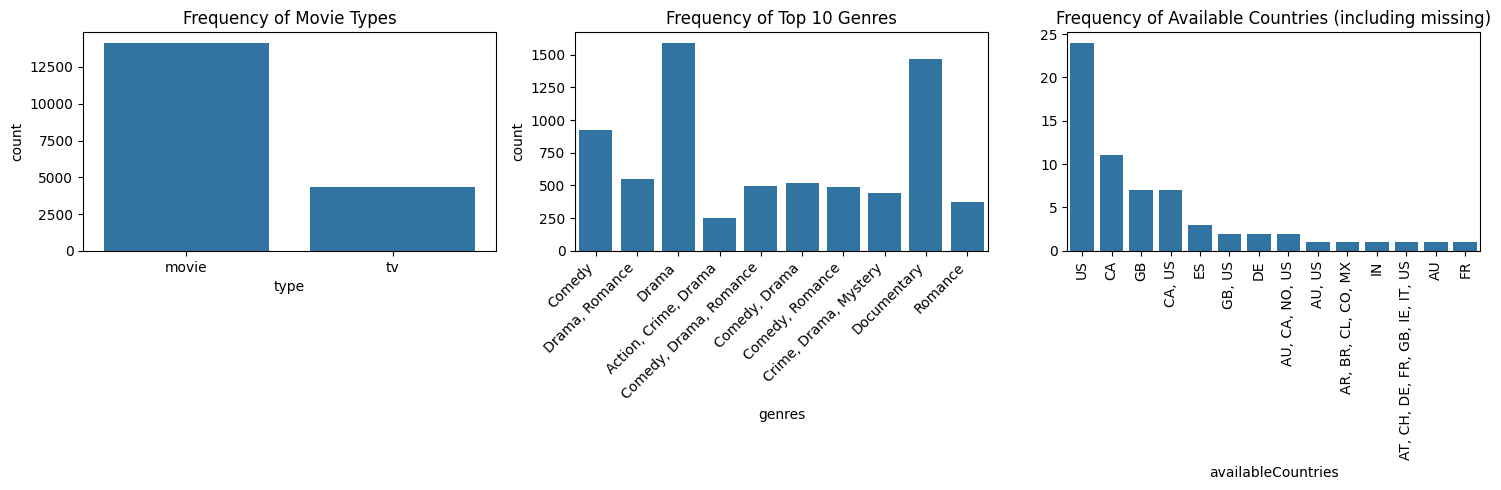

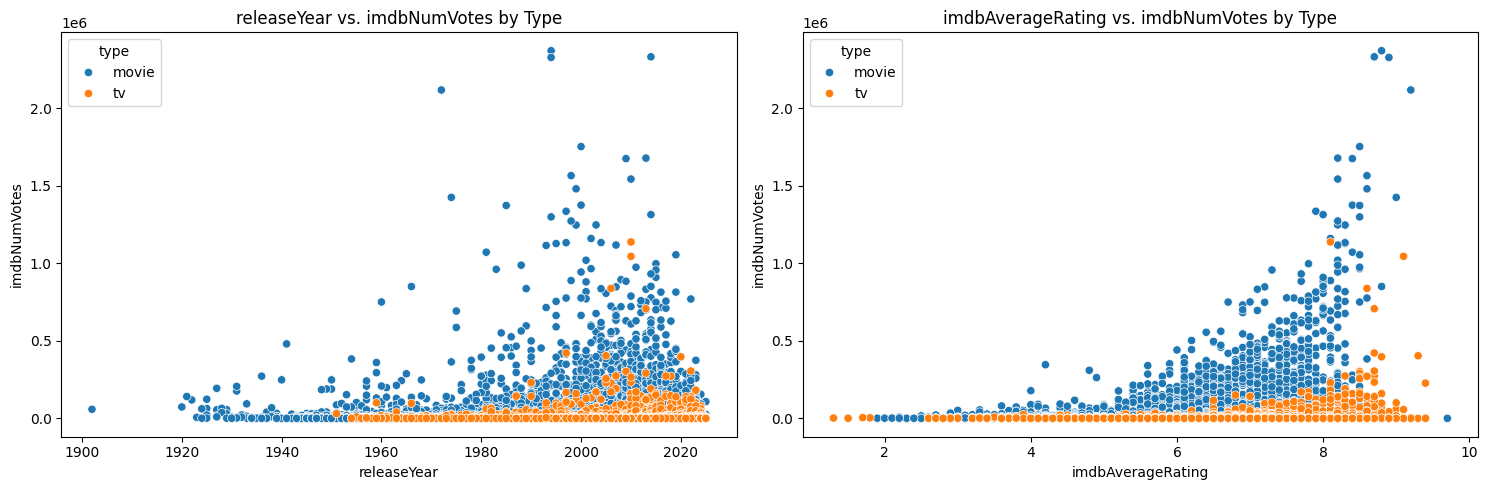

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1 & 2. Histograms and Box plots for numerical features
plt.figure(figsize=(15, 10))
numerical_cols = ['releaseYear', 'imdbAverageRating', 'imdbNumVotes']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(2, 3, i + 4)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 3. Bar charts for categorical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='type', data=df)
plt.title('Frequency of Movie Types')

plt.subplot(1, 3, 2)
top_genres = df['genres'].value_counts().nlargest(10).index
sns.countplot(x=df[df['genres'].isin(top_genres)]['genres'])
plt.title('Frequency of Top 10 Genres')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
country_counts = df['availableCountries'].value_counts(dropna=False)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Frequency of Available Countries (including missing)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# 4. Scatter plots for numerical feature relationships
plt.figure(figsize=(15, 5))
for i, col1 in enumerate(['releaseYear', 'imdbAverageRating']):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(x=col1, y='imdbNumVotes', data=df, hue='type')
    plt.title(f'{col1} vs. imdbNumVotes by Type')
plt.tight_layout()
plt.show()

## Data clustering

### Subtask:
Perform K-means clustering on the dataset.


**Reasoning**:
Perform K-means clustering on the selected numerical features, add cluster labels to the DataFrame, and visualize the clusters.



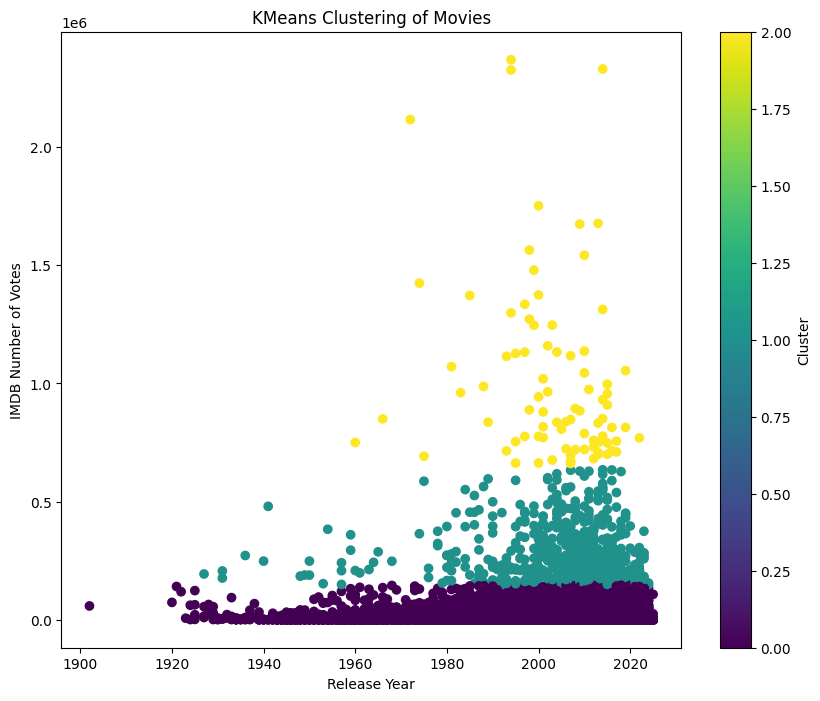

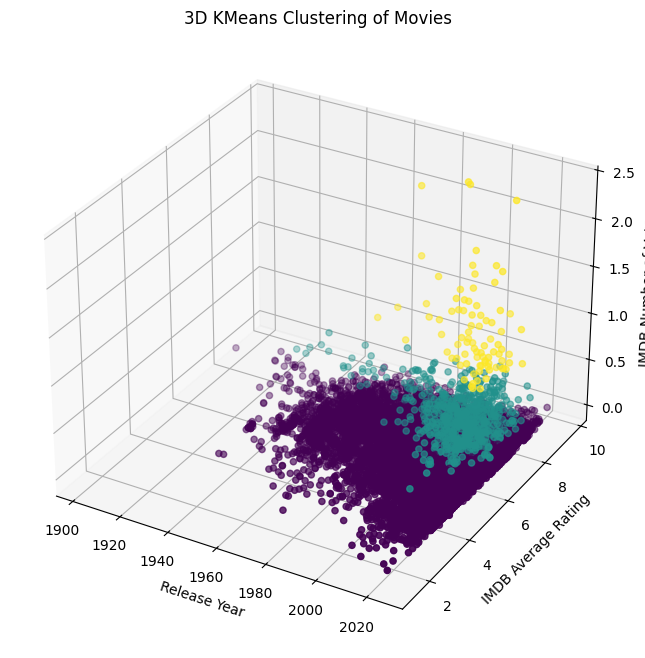

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. Select features and handle missing values
features = ['releaseYear', 'imdbAverageRating', 'imdbNumVotes']
df_cluster = df[features].dropna()

# 2. KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0) # Experiment with different n_clusters
kmeans.fit(df_cluster)
df['cluster'] = np.nan
df.loc[df_cluster.index, 'cluster'] = kmeans.labels_


# 4. Visualize clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_cluster['releaseYear'], df_cluster['imdbNumVotes'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Release Year')
plt.ylabel('IMDB Number of Votes')
plt.title('KMeans Clustering of Movies')
plt.colorbar(label='Cluster')

plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df_cluster['releaseYear'], df_cluster['imdbAverageRating'], df_cluster['imdbNumVotes'], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('Release Year')
ax.set_ylabel('IMDB Average Rating')
ax.set_zlabel('IMDB Number of Votes')
plt.title('3D KMeans Clustering of Movies')

plt.show()

## Summary:

### 1. Q&A

No questions were asked in the provided text.


### 2. Data Analysis Key Findings

* **Missing Data:** The `availableCountries` column has the most missing values (18403 out of 18467), followed by `imdbNumVotes` and `imdbAverageRating` (both 1962).  Other columns also contain missing values.
* **Numerical Feature Distributions:**  The `imdbNumVotes` exhibits a wide range and potential outliers, as revealed by box plots and descriptive statistics. The minimum release year is 1902, and maximum is 2025. The average `imdbAverageRating` is 6.37.
* **Correlation Analysis:**  A correlation matrix and heatmap revealed the relationships between 'releaseYear', 'imdbAverageRating', and 'imdbNumVotes'.
* **Categorical Feature Analysis:** The `type` column reveals two categories ('movie' and 'tv'), and the `genres` column contains 809 unique values with 'Drama' and 'Documentary' being most frequent.
* **US Availability Impact:**  Movies available in the US ('available\_in\_US' = 1) show a slightly different average `imdbAverageRating` compared to those not available in the US.
* **Clustering Results:**  K-means clustering (k=3) was applied to 'releaseYear', 'imdbAverageRating', and 'imdbNumVotes', resulting in three distinct clusters visualized in 2D and 3D scatter plots.


### 3. Insights or Next Steps

* **Address Missing Data:**  Investigate the reasons for missing data, particularly in the `availableCountries`, `imdbNumVotes`, and `imdbAverageRating` columns. Decide on an appropriate strategy for imputation or removal.
* **Explore Genre Impact:** Conduct a deeper analysis of the relationship between genres and `imdbAverageRating`, potentially focusing on specific genre groups to reveal further insights.
